# Prognosis based on Varying Data Quality

##### Imagine we have filters that get dirty over time when they're used to clean the air. We want to predict how long these filters will last before they stop working properly.

## Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the Dataset

In [2]:
dataset = pd.read_csv("Train_Data_CSV.csv")

In [3]:
dataset.head()

,Data_No,Differential_pressure,Flow_rate,Time,Dust_feed,Sampling,Bias_type,RUL
0,1,11.017769,34.500433,0.1,131.1,10,b,177.313137
1,1,0.000000,61.536411,0.2,131.0,10,b,177.313137
2,1,4.055263,72.332438,0.3,130.9,10,b,177.313137
3,1,0.000000,77.133230,0.4,130.8,10,b,177.313137
4,1,0.000000,79.470820,0.5,130.7,10,b,177.313137


## Getting the Insights

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42440 entries, 0 to 42439
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Data_No                42440 non-null  int64  
 1   Differential_pressure  42440 non-null  float64
 2   Flow_rate              42440 non-null  float64
 3   Time                   42440 non-null  float64
 4   Dust_feed              42440 non-null  float64
 5   Sampling               42440 non-null  int64  
 6   Bias_type              42440 non-null  object 
 7   RUL                    42440 non-null  float64
dtypes: float64(5), int64(2), object(1)
memory usage: 2.6+ MB


In [5]:
dataset["Bias_type"].unique()

array(['b', 'd', 'a', 'c'], dtype=object)

In [6]:
dataset["Bias_type"].value_counts()

Bias_type
a    12030
d    11976
c     9666
b     8768
Name: count, dtype: int64

## Preprocessing

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [8]:
dataset["Bias_type"] = le.fit_transform(dataset["Bias_type"])

In [9]:
dataset.head()

,Data_No,Differential_pressure,Flow_rate,Time,Dust_feed,Sampling,Bias_type,RUL
0,1,11.017769,34.500433,0.1,131.1,10,1,177.313137
1,1,0.000000,61.536411,0.2,131.0,10,1,177.313137
2,1,4.055263,72.332438,0.3,130.9,10,1,177.313137
3,1,0.000000,77.133230,0.4,130.8,10,1,177.313137
4,1,0.000000,79.470820,0.5,130.7,10,1,177.313137


In [10]:
dataset.describe()

,Data_No,Differential_pressure,Flow_rate,Time,Dust_feed,Sampling,Bias_type,RUL
count,42440.000000,42440.000000,42440.000000,42440.000000,42440.000000,42440.0,42440.000000,42440.000000
mean,17.897785,163.975464,83.288828,61.583992,61.483992,10.0,1.508671,93.246559
std,10.159593,175.509640,2.383809,36.455758,36.455758,0.0,1.175265,52.636410
min,1.000000,0.000000,0.000000,0.100000,0.000000,10.0,0.000000,59.111492
25%,9.000000,17.156569,82.481050,30.400000,30.300000,10.0,0.000000,59.111492
50%,18.000000,82.436720,83.030616,60.700000,60.600000,10.0,2.000000,59.111492
75%,27.000000,295.834962,84.353664,91.100000,91.000000,10.0,3.000000,177.313137
max,35.000000,686.263564,85.924299,145.700000,145.600000,10.0,3.000000,177.313137


## Some Visualizations for Checking the Skewness of the data

<Axes: xlabel='Differential_pressure', ylabel='Count'>

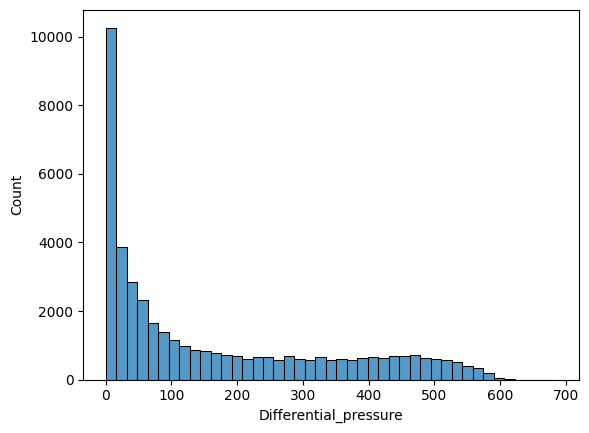

In [11]:
sns.histplot(data=dataset, x = "Differential_pressure")

<Axes: xlabel='Flow_rate', ylabel='Count'>

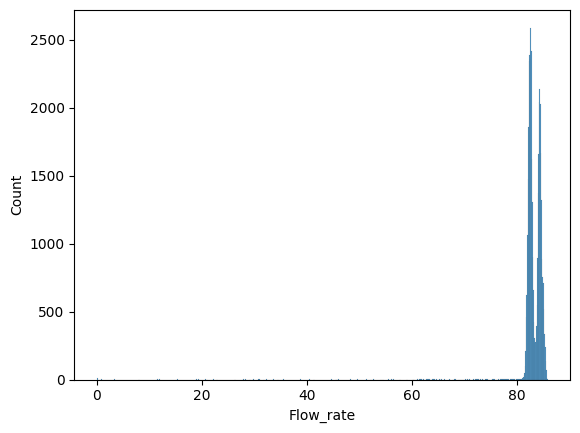

In [12]:
sns.histplot(data=dataset, x = "Flow_rate")

c:\Users\Ravin D\anaconda3\envs\MachineLearning\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


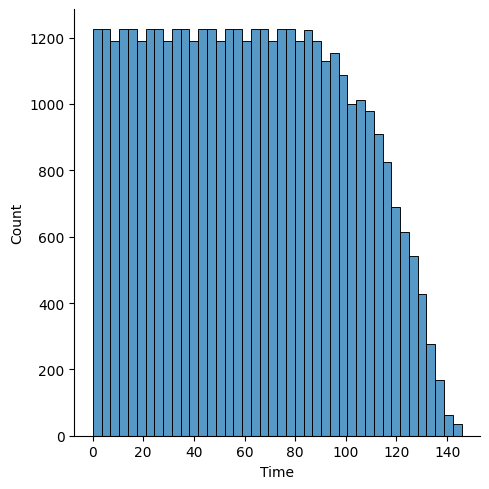

In [13]:
sns.displot(data=dataset, x = "Time")

<Axes: xlabel='RUL', ylabel='Count'>

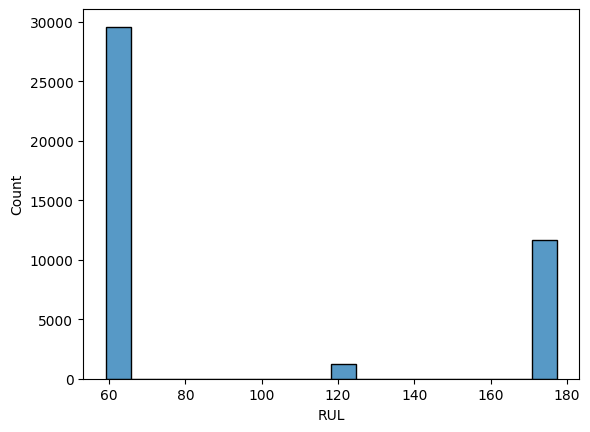

In [14]:
sns.histplot(x="RUL", data=dataset)

In [15]:
dataset["RUL"].value_counts()

RUL
59.111492     29582
177.313137    11654
118.223042     1204
Name: count, dtype: int64

In [16]:
dataset["RUL"].unique()

array([177.3131368 ,  59.11149152, 118.2230421 ])

c:\Users\Ravin D\anaconda3\envs\MachineLearning\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


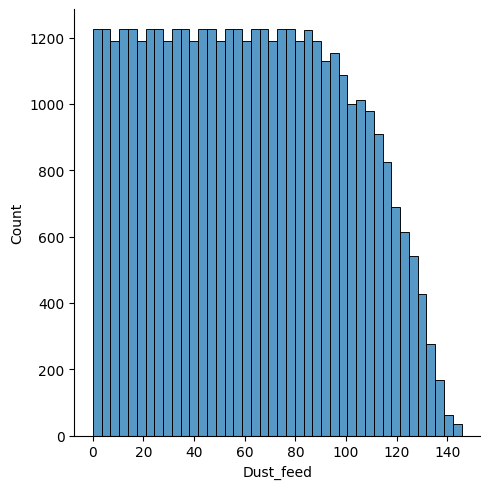

In [17]:
field = "Dust_feed"
sns.displot(data=dataset, x = field)

## Dropping Unwanted Columns

In [18]:
dataset.head()

,Data_No,Differential_pressure,Flow_rate,Time,Dust_feed,Sampling,Bias_type,RUL
0,1,11.017769,34.500433,0.1,131.1,10,1,177.313137
1,1,0.000000,61.536411,0.2,131.0,10,1,177.313137
2,1,4.055263,72.332438,0.3,130.9,10,1,177.313137
3,1,0.000000,77.133230,0.4,130.8,10,1,177.313137
4,1,0.000000,79.470820,0.5,130.7,10,1,177.313137


In [19]:
dataset["Data_No"].value_counts()

Data_No
11    1457
23    1405
5     1392
9     1391
29    1377
3     1354
14    1349
27    1335
28    1332
31    1327
1     1312
10    1311
30    1302
16    1278
4     1268
33    1263
32    1261
19    1256
22    1217
7     1202
24    1178
35    1175
2     1168
20    1167
17    1151
13    1149
25    1130
21    1114
6     1073
8     1015
26    1012
18     973
12     971
15     910
34     865
Name: count, dtype: int64

In [20]:
dataset.drop(["Data_No"], axis=1, inplace=True)

In [21]:
dataset.head()

,Differential_pressure,Flow_rate,Time,Dust_feed,Sampling,Bias_type,RUL
0,11.017769,34.500433,0.1,131.1,10,1,177.313137
1,0.000000,61.536411,0.2,131.0,10,1,177.313137
2,4.055263,72.332438,0.3,130.9,10,1,177.313137
3,0.000000,77.133230,0.4,130.8,10,1,177.313137
4,0.000000,79.470820,0.5,130.7,10,1,177.313137


In [22]:
#[177.3131368 ,  59.11149152, 118.2230421 ]

dataset.replace({"RUL":{177.3131368:0,118.2230421:1, 59.11149152:2}}, inplace=True)

## Splitting into Dependent and Independent Variables

In [23]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

## Splitting into Training and testing sets

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

## Feature Scaling

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

## Model Implementation

In [26]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(criterion='entropy',n_estimators=50,random_state=0)
model.fit(X_train,y_train.ravel())
print("The Model is ready to predict")

The Model is ready to predict


## Prediction of Testing set

In [27]:
y_pred = model.predict(X_test)

## Checking the Accuracy

In [28]:
from sklearn.metrics import accuracy_score
print("Accuracy: ",accuracy_score(y_test,y_pred)*100)

Accuracy:  97.64373232799247


# Checking with my Automate Function

In [29]:
from automate import find_best_n_estimators
find_best_n_estimators(X_train, y_train, X_test, y_test, 40, 70, step = 1, rs = 0)

Checking n_estimators = 40 for Random Forest Classifier
Checking n_estimators = 41 for Random Forest Classifier
Checking n_estimators = 42 for Random Forest Classifier
Checking n_estimators = 43 for Random Forest Classifier
Checking n_estimators = 44 for Random Forest Classifier
Checking n_estimators = 45 for Random Forest Classifier
Checking n_estimators = 46 for Random Forest Classifier
Checking n_estimators = 47 for Random Forest Classifier
Checking n_estimators = 48 for Random Forest Classifier
Checking n_estimators = 49 for Random Forest Classifier
Checking n_estimators = 50 for Random Forest Classifier
Checking n_estimators = 51 for Random Forest Classifier
Checking n_estimators = 52 for Random Forest Classifier
Checking n_estimators = 53 for Random Forest Classifier
Checking n_estimators = 54 for Random Forest Classifier
Checking n_estimators = 55 for Random Forest Classifier
Checking n_estimators = 56 for Random Forest Classifier
Checking n_estimators = 57 for Random Forest Cla

[0.9782045240339302, 60]

## Testing with n_estimators = 60

In [30]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(criterion='entropy',n_estimators=60,random_state=0)
model.fit(X_train,y_train.ravel())

y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy: ",accuracy_score(y_test,y_pred)*100)

Accuracy:  97.82045240339302
